In [7]:
######   FARADAY ROCKETRY UPV   ######

# Simulación de vuelo nominal para el cohete Skybreaker
# Perfil lineal del viento

###   Versión 2/03/2025   ###

In [1]:
# IMPORTACIÓN DE LOS MÓDULOS NECESARIOS

from rocketpy import Environment, SolidMotor, Rocket, Flight, NoseCone, TrapezoidalFins

import datetime

import math as math

import numpy as np

import rocket_data as data

In [2]:
# DEFINICIÓN DE LA ATMÓSFERA

# Datos Environment
magnitud_viento_10km = 30
magnitud_viento_superficie = 3
heading_viento = 50
latitud_base = 39.38895
longitud_base = -8.28837
elevacion_base = 100

# Perfil lineal del viento
m = (magnitud_viento_10km - magnitud_viento_superficie) / 10000

perfil_viento_u = list()
perfil_viento_v = list()

for h in list(range(0,10000 + 1,30)):
    magnitud_viento = m*h + magnitud_viento_superficie  # Ecuación de la recta
    viento_u = magnitud_viento * np.sin( heading_viento * math.pi/180 ) # Componente dirección Este
    viento_v = magnitud_viento * np.cos( heading_viento * math.pi/180 ) # COmponente dirección Norte
    perfil_viento_u.append([h,viento_u])
    perfil_viento_v.append([h,viento_v])

# Se define la clase Environment
env = Environment(
    latitude = latitud_base,
    longitude = longitud_base,
    elevation = elevacion_base
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)
env.set_atmospheric_model(
    type="custom_atmosphere",
    wind_u = perfil_viento_u,
    wind_v = perfil_viento_v,
)
env.max_expected_height = 12000

#env.info()

In [3]:
# DEFINICIÓN DE LOS MOTORES

# Primera etapa
M1174 = SolidMotor(
    thrust_source = "M1174.eng",
    dry_mass = data.Skybreaker_motor_dry_mass,
    dry_inertia = (
        data.Skybreaker_motor_I11,
        data.Skybreaker_motor_I11,
        data.Skybreaker_motor_I33,
    ),
    nozzle_radius = data.Skybreaker_motor_nozzle_radius,
    grain_number = data.Skybreaker_motor_grain_number,
    grain_density = data.Skybreaker_motor_grain_density,
    grain_outer_radius = data.Skybreaker_motor_outer_grain_radius,
    grain_initial_inner_radius = data.Skybreaker_motor_initial_inner_grain_radius,
    grain_initial_height = data.Skybreaker_motor_height_grain,
    grain_separation = data.Skybreaker_motor_grain_separation,
    grains_center_of_mass_position = data.Skybreaker_motor_cdg_grain,
    center_of_dry_mass_position = data.Skybreaker_motor_dry_cdg,
    nozzle_position = 0,
    throat_radius = data.Skybreaker_motor_throat_radius,
    coordinate_system_orientation = "nozzle_to_combustion_chamber",
)

#print(M1174.dry_mass)
#print(M1174.propellant_initial_mass)
# M1174.info()

In [4]:
# DEFINICIÓN DE LAS SUPERFICIES AERODINÁMICAS

# Nose cone
nose_cone = NoseCone(
    length = data.Skybreaker_nosecone_length,
    kind = "lvhaack",
    base_radius = data.Skybreaker_radius,
    bluffness = None,
    rocket_radius = data.Skybreaker_radius,
    name = "Nose Cone",
)

# Aletas
aletas = TrapezoidalFins(
    n = data.Skybreaker_fins_number,
    root_chord = data.Skybreaker_fins_root_chord,
    tip_chord = data.Skybreaker_fins_tip_chord,
    span = data.Skybreaker_fins_span,
    rocket_radius = data.Skybreaker_radius,
    sweep_length = data.Skybreaker_fins_sweep_length,
    name = "Aletas",     
)

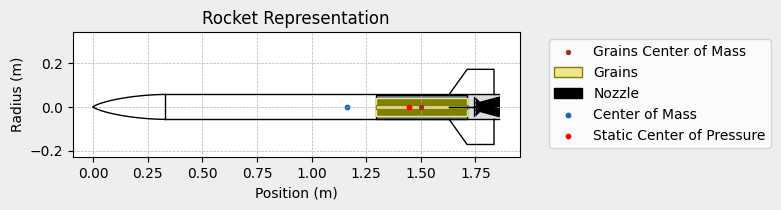

Centro de Gravedad (mm): 1163.7975901036086
Centro de Presiones (mm): 1447.5233319937522


In [5]:
# Skybreaker

SKYBREAKER = Rocket(
    radius = data.Skybreaker_radius,
    mass = data.Skybreaker_no_motor_mass,
    inertia = (
        data.Skybreaker_I11,
        data.Skybreaker_I11,
        data.Skybreaker_I33,
    ),
    power_off_drag = "skybreaker_power_off_drag_datcom.csv",
    power_on_drag = "skybreaker_power_on_drag_datcom.csv",
    center_of_mass_without_motor = data.Skybreaker_no_motor_cdg,
    coordinate_system_orientation = "nose_to_tail",
)

SKYBREAKER.add_motor(M1174,data.Skybreaker_length)
SKYBREAKER.add_surfaces(nose_cone, positions = 0)
SKYBREAKER.add_surfaces(aletas, positions = data.Skybreaker_fins_position)

# SKYBREAKER.prints.inertia_details()
SKYBREAKER.draw()
print('Centro de Gravedad (mm):',SKYBREAKER.center_of_mass(0) * 1000)
print('Centro de Presiones (mm):',SKYBREAKER.cp_position(0) * 1000)

In [6]:
# SIMULACIÓN DE VUELO

# Datos
rail_longitud = 7.5
rail_heading = 300
rail_inclinacion = 85

# Ambas etapas
SKYBREAKER_flight = Flight(
    rocket = SKYBREAKER,
    environment = env,
    rail_length = rail_longitud,
    inclination = rail_inclinacion,
    heading = rail_heading,
    terminate_on_apogee = True,
    name = "Skybreaker's Flight",
)

# initial_solution = [
#     6.99,
#     0, 0, 1500,
#     0, 0, 231.152911754263,
#     1, 0, 0, 0,
#     0, 0, 0
# ]

# SKYBREAKER_flight = Flight(
#     rocket = SKYBREAKER,
#     environment = env,
#     rail_length = rail_longitud,
#     inclination = rail_inclinacion,
#     heading = rail_heading,
#     terminate_on_apogee=True,
#     initial_solution=initial_solution,
#     max_time_step = 0.01,
#     name = "Skybreaker's Flight",
# )


# SKYBREAKER_flight.plots.trajectory_3d()
# SKYBREAKER_flight.prints.stability_margin()
# SKYBREAKER_flight.mach_number.plot(0,separation_timer)
# SKYBREAKER_flight.az.plot(0,1)
# SKYBREAKER_flight.z.plot(0,1)

SKYBREAKER_flight.export_data("original_flight_data.csv",'x','y','z','vx','vy','vz','w1','w2','w3','R3')

